# Prueba técnica David Pernas

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
tweets_newer_df = pd.read_csv('../data/tweets_newer.csv')
tweets_older_df = pd.read_csv('../data/tweets_older.csv')
users_df = pd.read_csv('../data/users.csv')

In [106]:
tweets_newer_df.head()

,id,contenido,fecha_publicacion,usuario_id,retweets,replies,likes,quotes
0,1625126689150738438,Les compartimos un mini resumen del 1º encuent...,2023-02-13 13:36:10,4899284631,0,0,2,1
1,1625165984414695426,¡Nos vamos al WorkinLan Workshop en Bilbao jun...,2023-02-13 16:12:19,1162694149956603904,2,0,1,0
2,1625813763751305216,Gracias a nuestros amigos @TheBridge_Tech por ...,2023-02-15 11:06:22,1530194743786881024,2,1,10,0
3,1625825721862987777,@BitcoinTuesday_ ¡Un placer!,2023-02-15 11:53:53,1162694149956603904,0,0,2,0
4,1625828554691805187,¿Los colores tienen género?¿podemos hacer una ...,2023-02-15 12:05:08,1162694149956603904,2,1,2,0


In [107]:
tweets_newer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 143 non-null    int64 
 1   contenido          143 non-null    object
 2   fecha_publicacion  143 non-null    object
 3   usuario_id         143 non-null    int64 
 4   retweets           143 non-null    int64 
 5   replies            143 non-null    int64 
 6   likes              143 non-null    int64 
 7   quotes             143 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 9.1+ KB


In [108]:
tweets_older_df.head()

,Unnamed: 0,Date,User,Tweet,Likes,Retweets,Replies
0,0,2022-05-19 15:39:16+00:00,TheBridge_Tech,¡Qué poco queda para el próximo 🔥Burn Monday🔥!...,0,2,0
1,1,2022-05-18 15:23:22+00:00,TheBridge_Tech,Esta es la historia de Isis🤗 que decidió hacer...,0,0,0
2,2,2022-05-18 11:26:31+00:00,TheBridge_Tech,Gracias @victorianoI y equipo por el análisis ...,0,0,0
3,3,2022-05-18 08:31:13+00:00,Bcasapp,¿Cómo combatir el paro juvenil🥵? #tipdeldia En...,8,4,1
4,4,2022-05-17 14:53:47+00:00,TheBridge_Tech,¿Con ganas de probar si un empleo tecnológico ...,2,2,0


In [109]:
tweets_older_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  134 non-null    int64 
 1   Date        134 non-null    object
 2   User        134 non-null    object
 3   Tweet       134 non-null    object
 4   Likes       134 non-null    int64 
 5   Retweets    134 non-null    int64 
 6   Replies     134 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 7.5+ KB


In [110]:
users_df.head()

,id,nombre,nombre_usuario
0,987047282,A3Sec,a3sec
1,1162694149956603904,The Bridge,TheBridge_Tech
2,41545659,Mario Lopez de Avila,nodosenlared
3,1162694149956603904,The Bridge,TheBridge_Tech
4,1162694149956603904,The Bridge,TheBridge_Tech


In [111]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              143 non-null    int64 
 1   nombre          143 non-null    object
 2   nombre_usuario  143 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.5+ KB


In [112]:
users_df.drop_duplicates(keep= 'first', inplace= True)

In [113]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 0 to 140
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              38 non-null     int64 
 1   nombre          38 non-null     object
 2   nombre_usuario  38 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.2+ KB


In [114]:
tweets_newer_df.drop(columns= ['quotes', 'id'], inplace= True)

In [115]:
tweets_newer_df.head()

,contenido,fecha_publicacion,usuario_id,retweets,replies,likes
0,Les compartimos un mini resumen del 1º encuent...,2023-02-13 13:36:10,4899284631,0,0,2
1,¡Nos vamos al WorkinLan Workshop en Bilbao jun...,2023-02-13 16:12:19,1162694149956603904,2,0,1
2,Gracias a nuestros amigos @TheBridge_Tech por ...,2023-02-15 11:06:22,1530194743786881024,2,1,10
3,@BitcoinTuesday_ ¡Un placer!,2023-02-15 11:53:53,1162694149956603904,0,0,2
4,¿Los colores tienen género?¿podemos hacer una ...,2023-02-15 12:05:08,1162694149956603904,2,1,2


In [116]:
tweets_older_df.drop(columns= 'Unnamed: 0', inplace= True)

In [117]:
merged_df = pd.merge(tweets_newer_df, users_df[['id', 'nombre_usuario']], left_on='usuario_id', right_on='id', how='left')
tweets_newer_df['user'] = merged_df['nombre_usuario']

In [118]:
tweets_newer_df = merged_df.copy()

In [119]:
tweets_newer_df.drop(columns= 'usuario_id', inplace= True)

In [120]:
tweets_newer_df = tweets_newer_df.rename(columns= {'contenido': 'Tweet', 'fecha_publicacion': 'Date', 'retweets': 'Retweets',
                                                    'replies': 'Replies', 'likes': 'Likes', 'nombre_usuario': 'User'})

In [121]:
tweets_newer_df.head()

,Tweet,Date,Retweets,Replies,Likes,id,User
0,Les compartimos un mini resumen del 1º encuent...,2023-02-13 13:36:10,0,0,2,4899284631,my_tech_plan
1,¡Nos vamos al WorkinLan Workshop en Bilbao jun...,2023-02-13 16:12:19,2,0,1,1162694149956603904,TheBridge_Tech
2,Gracias a nuestros amigos @TheBridge_Tech por ...,2023-02-15 11:06:22,2,1,10,1530194743786881024,BitcoinTuesday_
3,@BitcoinTuesday_ ¡Un placer!,2023-02-15 11:53:53,0,0,2,1162694149956603904,TheBridge_Tech
4,¿Los colores tienen género?¿podemos hacer una ...,2023-02-15 12:05:08,2,1,2,1162694149956603904,TheBridge_Tech


In [122]:
tweets_older_df.head()

,Date,User,Tweet,Likes,Retweets,Replies
0,2022-05-19 15:39:16+00:00,TheBridge_Tech,¡Qué poco queda para el próximo 🔥Burn Monday🔥!...,0,2,0
1,2022-05-18 15:23:22+00:00,TheBridge_Tech,Esta es la historia de Isis🤗 que decidió hacer...,0,0,0
2,2022-05-18 11:26:31+00:00,TheBridge_Tech,Gracias @victorianoI y equipo por el análisis ...,0,0,0
3,2022-05-18 08:31:13+00:00,Bcasapp,¿Cómo combatir el paro juvenil🥵? #tipdeldia En...,8,4,1
4,2022-05-17 14:53:47+00:00,TheBridge_Tech,¿Con ganas de probar si un empleo tecnológico ...,2,2,0


In [123]:
tweets_older_df['Date'] = tweets_older_df['Date'].str[:-6]

In [124]:
merged_df = pd.merge(tweets_older_df, users_df[['id', 'nombre_usuario']], left_on='User', right_on='nombre_usuario', how='left')
tweets_older_df['User'] = merged_df['nombre_usuario']

In [125]:
tweets_older_df = merged_df.copy()

In [126]:
tweets_older_df.drop(columns= 'nombre_usuario', inplace= True)

In [127]:
tweets_older_df.head()

,Date,User,Tweet,Likes,Retweets,Replies,id
0,2022-05-19 15:39:16,TheBridge_Tech,¡Qué poco queda para el próximo 🔥Burn Monday🔥!...,0,2,0,1.162694e+18
1,2022-05-18 15:23:22,TheBridge_Tech,Esta es la historia de Isis🤗 que decidió hacer...,0,0,0,1.162694e+18
2,2022-05-18 11:26:31,TheBridge_Tech,Gracias @victorianoI y equipo por el análisis ...,0,0,0,1.162694e+18
3,2022-05-18 08:31:13,Bcasapp,¿Cómo combatir el paro juvenil🥵? #tipdeldia En...,8,4,1,NaN
4,2022-05-17 14:53:47,TheBridge_Tech,¿Con ganas de probar si un empleo tecnológico ...,2,2,0,1.162694e+18


In [128]:
tweets_all_df = pd.concat([tweets_older_df, tweets_newer_df])

In [129]:
tweets_all_df.reset_index(drop= True)

,Date,User,Tweet,Likes,Retweets,Replies,id
0,2022-05-19 15:39:16,TheBridge_Tech,¡Qué poco queda para el próximo 🔥Burn Monday🔥!...,0,2,0,1.162694e+18
1,2022-05-18 15:23:22,TheBridge_Tech,Esta es la historia de Isis🤗 que decidió hacer...,0,0,0,1.162694e+18
2,2022-05-18 11:26:31,TheBridge_Tech,Gracias @victorianoI y equipo por el análisis ...,0,0,0,1.162694e+18
3,2022-05-18 08:31:13,Bcasapp,¿Cómo combatir el paro juvenil🥵? #tipdeldia En...,8,4,1,NaN
4,2022-05-17 14:53:47,TheBridge_Tech,¿Con ganas de probar si un empleo tecnológico ...,2,2,0,1.162694e+18
...,...,...,...,...,...,...,...
272,2023-05-16 11:15:34,TheBridge_Tech,Así es el #bootcamp de #UXUIProductDesign que ...,3,1,0,1.162694e+18
273,2023-05-17 11:06:23,TheBridge_Tech,Nos colamos en el campus de #Bilbao para descu...,2,1,0,1.162694e+18
274,2023-05-17 13:21:52,nodosenlared,"#MLMonitoring and #Observability, mar, 23 may ...",3,1,0,4.154566e+07
275,2023-05-18 10:00:23,TheBridge_Tech,¿Qué hacían nuestros alumni antes del #bootcam...,0,0,0,1.162694e+18


In [130]:
tweets_all_df.drop(columns= 'id', inplace= True)

In [131]:
tweets_all_df.head()

,Date,User,Tweet,Likes,Retweets,Replies
0,2022-05-19 15:39:16,TheBridge_Tech,¡Qué poco queda para el próximo 🔥Burn Monday🔥!...,0,2,0
1,2022-05-18 15:23:22,TheBridge_Tech,Esta es la historia de Isis🤗 que decidió hacer...,0,0,0
2,2022-05-18 11:26:31,TheBridge_Tech,Gracias @victorianoI y equipo por el análisis ...,0,0,0
3,2022-05-18 08:31:13,Bcasapp,¿Cómo combatir el paro juvenil🥵? #tipdeldia En...,8,4,1
4,2022-05-17 14:53:47,TheBridge_Tech,¿Con ganas de probar si un empleo tecnológico ...,2,2,0


In [132]:
tweets_all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 142
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      277 non-null    object
 1   User      277 non-null    object
 2   Tweet     277 non-null    object
 3   Likes     277 non-null    int64 
 4   Retweets  277 non-null    int64 
 5   Replies   277 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 15.1+ KB


In [133]:
tweets_all_df['Date'].sort_values()

133    2022-01-05 08:00:01
132    2022-01-08 12:10:46
131    2022-01-09 17:23:02
130    2022-01-12 19:03:03
129    2022-01-18 16:02:13
              ...         
138    2023-05-16 11:15:34
139    2023-05-17 11:06:23
140    2023-05-17 13:21:52
141    2023-05-18 10:00:23
142    2023-05-19 11:01:18
Name: Date, Length: 277, dtype: object

In [136]:
tweets_all_df.to_csv('../data/tweets_all.csv')

In [137]:
import sqlite3

In [138]:
conn = sqlite3.Connection('../database/prueba_tecnica.db')

In [139]:
users_df.to_sql(name='Users', con= conn)

38

In [140]:
tweets_all_df.to_sql(name='Tweets', con= conn)

277

In [222]:
# ¿Cuál es el tweet con mayor repercusión social?
# Interpreto que es el que tenga mayor número de Retweets

print(tweets_all_df[['Tweet', 'Retweets']][tweets_all_df['Retweets'] == tweets_all_df['Retweets'].max()])


                                                Tweet  Retweets
91  par reactiv ten meetup este mart de abril a la...        25


In [159]:
tweets_all_df[['Tweet', 'Retweets']].sort_values(by= 'Retweets', ascending= False)[:1]

,Tweet,Retweets
91,Para reactivarse!!!\nTenemos Meetup este marte...,25


In [160]:
# ¿Cuál es el usuario que más menciona a la escuela?

tweets_all_df['User'].value_counts()[:2]

TheBridge_Tech    98
DatabeerSVQ       17
Name: User, dtype: int64

In [161]:
tweets_all_df['User'].groupby(by= tweets_all_df['User']).count().sort_values(ascending= False)[:2]

User
TheBridge_Tech    98
DatabeerSVQ       17
Name: User, dtype: int64

In [162]:
# ¿En qué mes se concentra el mayor número de tweets?

tweets_all_df['Date'] = pd.to_datetime(tweets_all_df['Date'])

In [170]:
tweets_all_df['Date'].groupby(by= tweets_all_df['Date'].dt.month).count().sort_values(ascending= False)

Date
3    100
4     87
5     37
2     36
1     17
Name: Date, dtype: int64

In [171]:
# Es el mes 3 (marzo), hay 100 tweets

In [172]:
# ¿Qué palabras son más frecuentes?

In [178]:
from collections import defaultdict
from wordcloud import STOPWORDS
from plotly import tools
import plotly.graph_objects as go
import plotly.offline as py
import nltk

In [181]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/david/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [182]:
stopwords = nltk.corpus.stopwords.words('spanish')

In [183]:
## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in stopwords]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

In [184]:
## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

In [185]:
## Get the bar chart from sincere questions ##
freq_dict = defaultdict(int)
for sent in tweets_all_df['Tweet']:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')


fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words"])
fig.append_trace(trace0, 1, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

/usr/lib/python3/dist-packages/plotly/tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [186]:
# ¿Qué tipo de correlación matemática encuentras entre las métricas públicas?

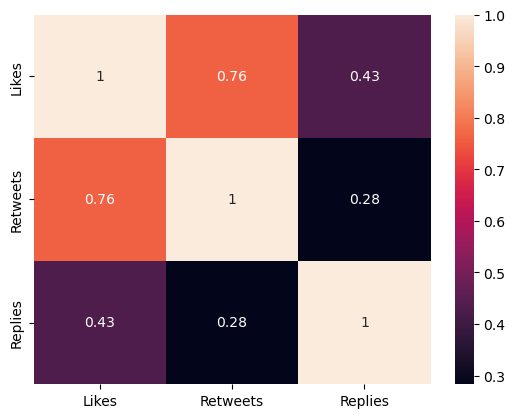

In [190]:
sns.heatmap(tweets_all_df.corr(numeric_only= True), annot= True);

In [191]:
# Hay una correlación lineal directa relevante entre likes y retweets (coef. 0.76)
# Hay una correlación lineal directa más débil entre likes y replies (coef. 0.43)

In [192]:
# ¿Has sacado alguna conclusión extra en tu análisis?

In [207]:
# Análisis de sentimiento con modelo preentrenado

In [ ]:
# ¿Cuáles son las predicciones? Interpreta los resultados

In [194]:
tweets_all_df.shape

(277, 6)

In [195]:
# Eliminamos los duplicados
tweets_all_df.drop_duplicates(subset = 'Tweet', inplace=True)
tweets_all_df.shape

(275, 6)

In [197]:
# Quitar signos de puntuación
import re

signos = re.compile("(\.)|(\;)|(\:)|(\!)|(\¡)|(\?)|(\¿)|(\@)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)")

def signs_tweets(tweet):
    return signos.sub('', tweet.lower())

tweets_all_df['Tweet'] = tweets_all_df['Tweet'].apply(signs_tweets)
tweets_all_df['Tweet'].head()

0    qué poco queda para el próximo 🔥burn monday🔥 l...
1    esta es la historia de isis🤗 que decidió hacer...
2    gracias victorianoi y equipo por el análisis c...
3    cómo combatir el paro juvenil🥵 #tipdeldia en u...
4    con ganas de probar si un empleo tecnológico e...
Name: Tweet, dtype: object

In [198]:
# Quitar hipervínculos
def remove_links(df):
    return " ".join(['{link}' if ('http') in word else word for word in df.split()])

tweets_all_df['Tweet'] = tweets_all_df['Tweet'].apply(remove_links)

In [199]:
# Aplicar stemmer
from nltk.stem.snowball import SnowballStemmer

def spanish_stemmer(x):
    stemmer = SnowballStemmer('spanish')
    return " ".join([stemmer.stem(word) for word in x.split()])

tweets_all_df['Tweet'] = tweets_all_df['Tweet'].apply(spanish_stemmer)
tweets_all_df['Tweet'].head()

0    que poc qued par el proxim 🔥burn monday🔥 lun d...
1    esta es la histori de isis🤗 que decid hac un c...
2    graci victorianoi y equip por el analisis con ...
3    com combat el par juvenil🥵 #tipdeldi en un pai...
4    con gan de prob si un emple tecnolog es par ti...
Name: Tweet, dtype: object

In [200]:
# Vectorizar dataset
# from sklearn.feature_extraction.text import CountVectorizer

# vectorizer = CountVectorizer(ngram_range=(1,2))
# X = vectorizer.fit_transform(tweets_all_df['Tweet'])

In [206]:
# Importamos el modelo preentrenado
import pickle

model = pickle.load(open('../model/sentiment_model', 'rb'))
model.get_feature_names_out

/usr/lib/python3/dist-packages/sklearn/base.py:299: UserWarning:

Trying to unpickle estimator CountVectorizer from version 1.0.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

/usr/lib/python3/dist-packages/sklearn/base.py:299: UserWarning:

Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

/usr/lib/python3/dist-packages/sklearn/base.py:299: UserWarning:

Trying to unpickle estimator Pipeline from version 1.0.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/

<bound method Pipeline.get_feature_names_out of Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.5, max_features=1000, min_df=5,
                                 ngram_range=(1, 2))),
                ('cls', LogisticRegression(C=0.5))])>

In [203]:
# Aplicar modelo para hacer predicción

predictions = model.predict(tweets_all_df['Tweet'])
tweets_all_df['Polarity'] = pd.Series(predictions)
tweets_all_df.head()

,Date,User,Tweet,Likes,Retweets,Replies,Polarity
0,2022-05-19 15:39:16,TheBridge_Tech,que poc qued par el proxim 🔥burn monday🔥 lun d...,0,2,0,1
1,2022-05-18 15:23:22,TheBridge_Tech,esta es la histori de isis🤗 que decid hac un c...,0,0,0,0
2,2022-05-18 11:26:31,TheBridge_Tech,graci victorianoi y equip por el analisis con ...,0,0,0,0
3,2022-05-18 08:31:13,Bcasapp,com combat el par juvenil🥵 #tipdeldi en un pai...,8,4,1,1
4,2022-05-17 14:53:47,TheBridge_Tech,con gan de prob si un emple tecnolog es par ti...,2,2,0,1


In [227]:
tweets_all_df['Polarity'].value_counts()[1]

114

In [228]:
tweets_all_df['Polarity'].value_counts()[0]

161

In [232]:
tweets_all_df[['Tweet', 'Retweets', 'Polarity']].sort_values(by= 'Retweets', ascending= False)

,Tweet,Retweets,Polarity
91,par reactiv ten meetup este mart de abril a la...,25,0
14,este de marz hay meetup en madr de bitcointues...,12,0
59,present cartelon par #databeersvq nos vem el j...,7,0
86,proxim meetup de bitcoin el de abril a las en ...,6,0
104,aun no has solicit tu bec par el #bootcamp de ...,5,1
...,...,...,...
31,thebridge_tech databeersvq vacolb andresmacari...,0,0
66,raulcotrin thebridge_tech craftcodetech codeho...,0,1
65,assemblerinstit thebridge_tech craftcodetech c...,0,0
64,andreamaganrey hol andre que gran trabaj estam...,0,0


<AxesSubplot:>

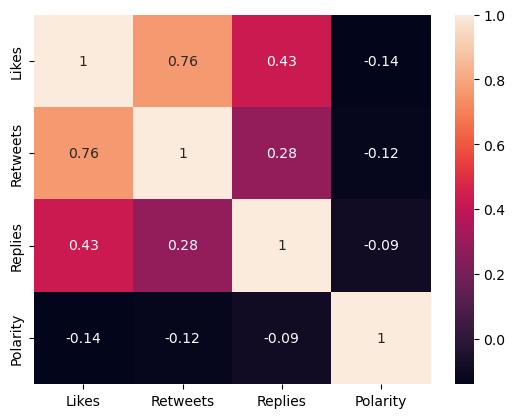

In [204]:
sns.heatmap(tweets_all_df.corr(numeric_only= True), annot= True);

In [210]:
# ¿Qué variables son las más importantes del modelo?

In [220]:
cv = model.named_steps["vect"]
cv.fit(tweets_all_df['Tweet'])
X = cv.transform(tweets_all_df['Tweet'])

# Importancia de los coeficientes. En total, todas las palabras vectorizadas
print(len(model.named_steps["cls"].coef_[0]))

# Cada coeficiente va asociado a una palabra
cv.get_feature_names_out()

# Montamos un diccionario con palabra -> coeficiente
feature_to_coef = {
    word: coef for word, coef in zip(
        cv.get_feature_names_out(), model.named_steps["cls"].coef_[0]
    )
}

1000


In [221]:
# Lista de las 5 variables más importantes para sentimiento positivo y para negativo

for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:5]:
    print(best_positive)
    
print('################################')
for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:5]:
    print(best_negative)

('masterclass', 1.427233666085361)
('olya_borderless', 1.4022058325629765)
('dond', 1.368604445686843)
('inform', 1.3429067328197288)
('organiz', 1.3421786219043959)
################################
('svq_tech', -1.8605111981502893)
('te', -1.8449366081495842)
('el futur', -1.6751185631684895)
('dirig', -1.459032652806634)
('la realiz', -1.346429032909559)


In [ ]:
# ¿Cómo podrías mejorar el modelo?

Podríamos hacer un preprocesado más elaborado, teniendo en cuenta:
1. Hashtags
2. Menciones
3. Abreviaturas
4. Faltas de ortografía
5. Risas
6. Emojis

Podríamos probar más modelos (por ejemplo SVM con kernel lineal), con distintos hiperparámetros, para dar con uno mejor.

In [ ]:
# ¿Qué otras oportunidades se te ocurren donde se podrían aplicar otros modelos de ML?